In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df['Loyalty'] = df['Tenure'] / df['Age']

In [13]:
num = df.select_dtypes(include = ['int','float'])
cat = df.select_dtypes(include = ['object'])

In [14]:
cat.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [15]:
num.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.137936
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.089506
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.064516
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.129032
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.200000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,0.555556


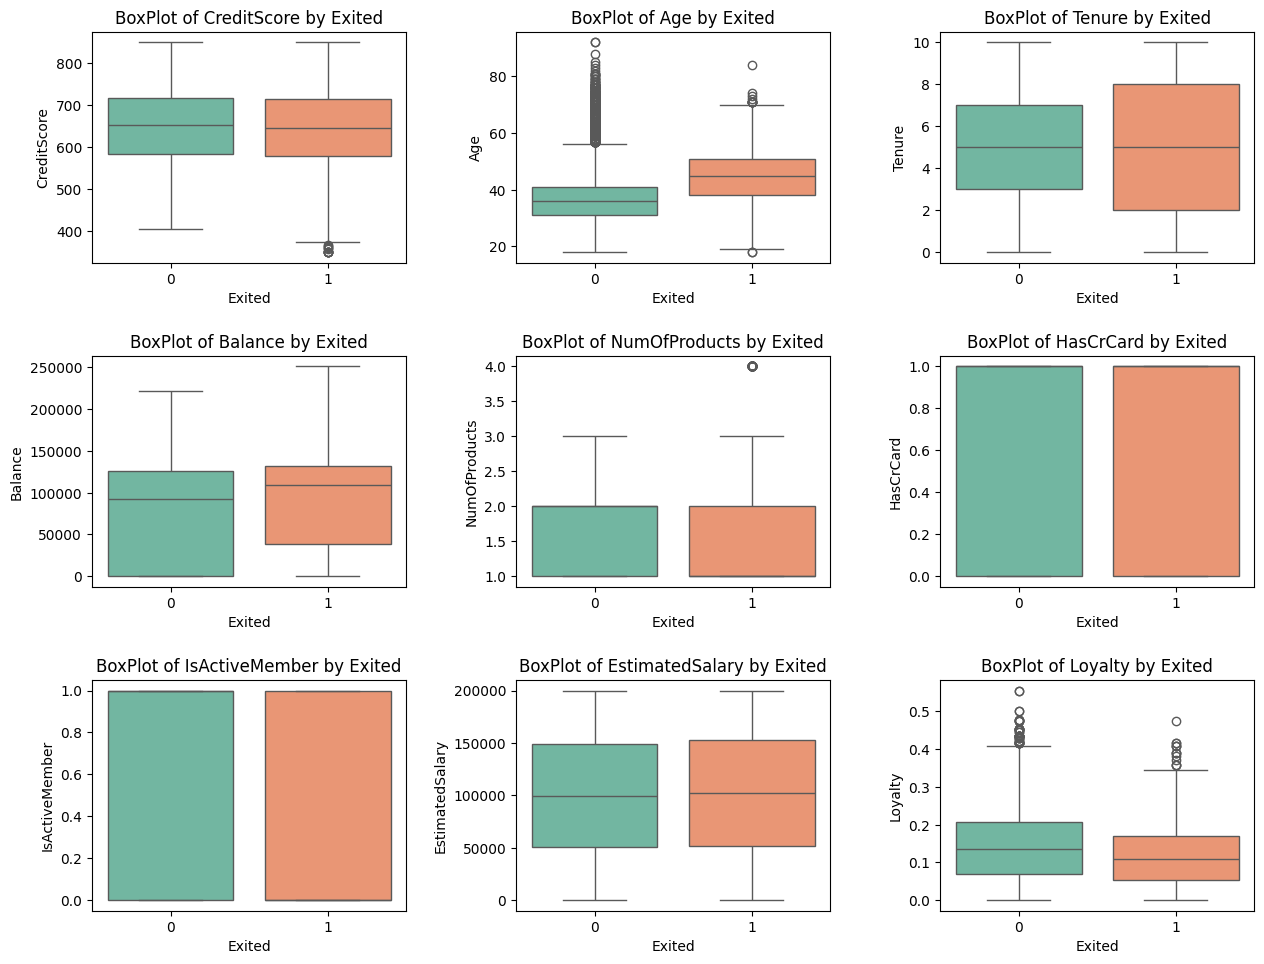

In [16]:
plt.figure(figsize=(13,10))
for i, col in enumerate(num.drop(columns=['Exited'])):
  plt.subplot(3,3,i+1)
  sns.boxplot(data = df,x='Exited',y=col, palette='Set2')
  plt.title(f'BoxPlot of {col} by Exited')
plt.tight_layout(pad=2)
plt.show()

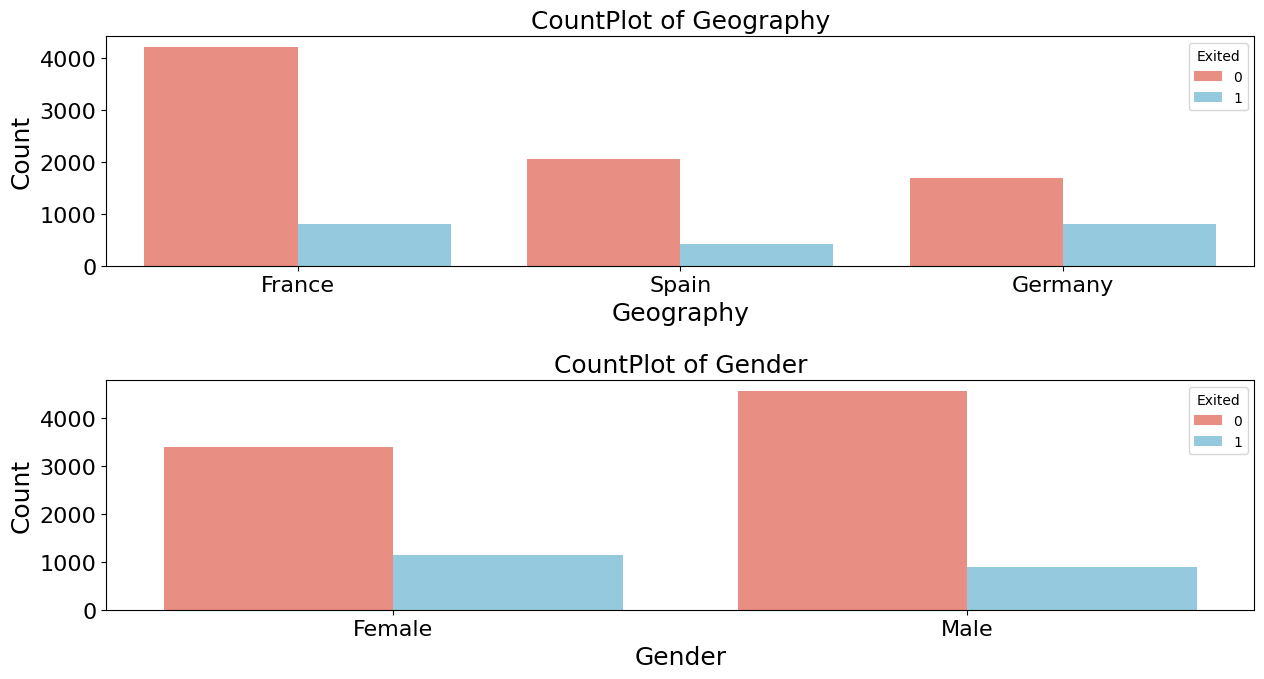

In [17]:
plt.figure(figsize=(13,10))
churn_colors = {1: 'skyblue', 0: 'salmon'}
for i , col in enumerate(cat):
  plt.subplot(3,1,i+1)
  sns.countplot(data=df,x=col,hue='Exited',palette=churn_colors)
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  plt.xlabel(col, fontsize=18)
  plt.ylabel('Count', fontsize=18)
  plt.title(f'CountPlot of {col}',fontsize=18)
plt.tight_layout(pad=2)
plt.show()

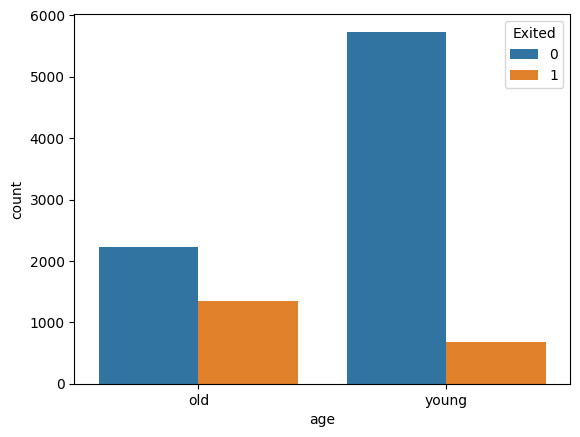

In [18]:
df['age'] = df['Age'].apply(lambda x: 'old' if x > 40 else 'young')
sns.countplot(x='age',hue='Exited',data = df)
plt.show()

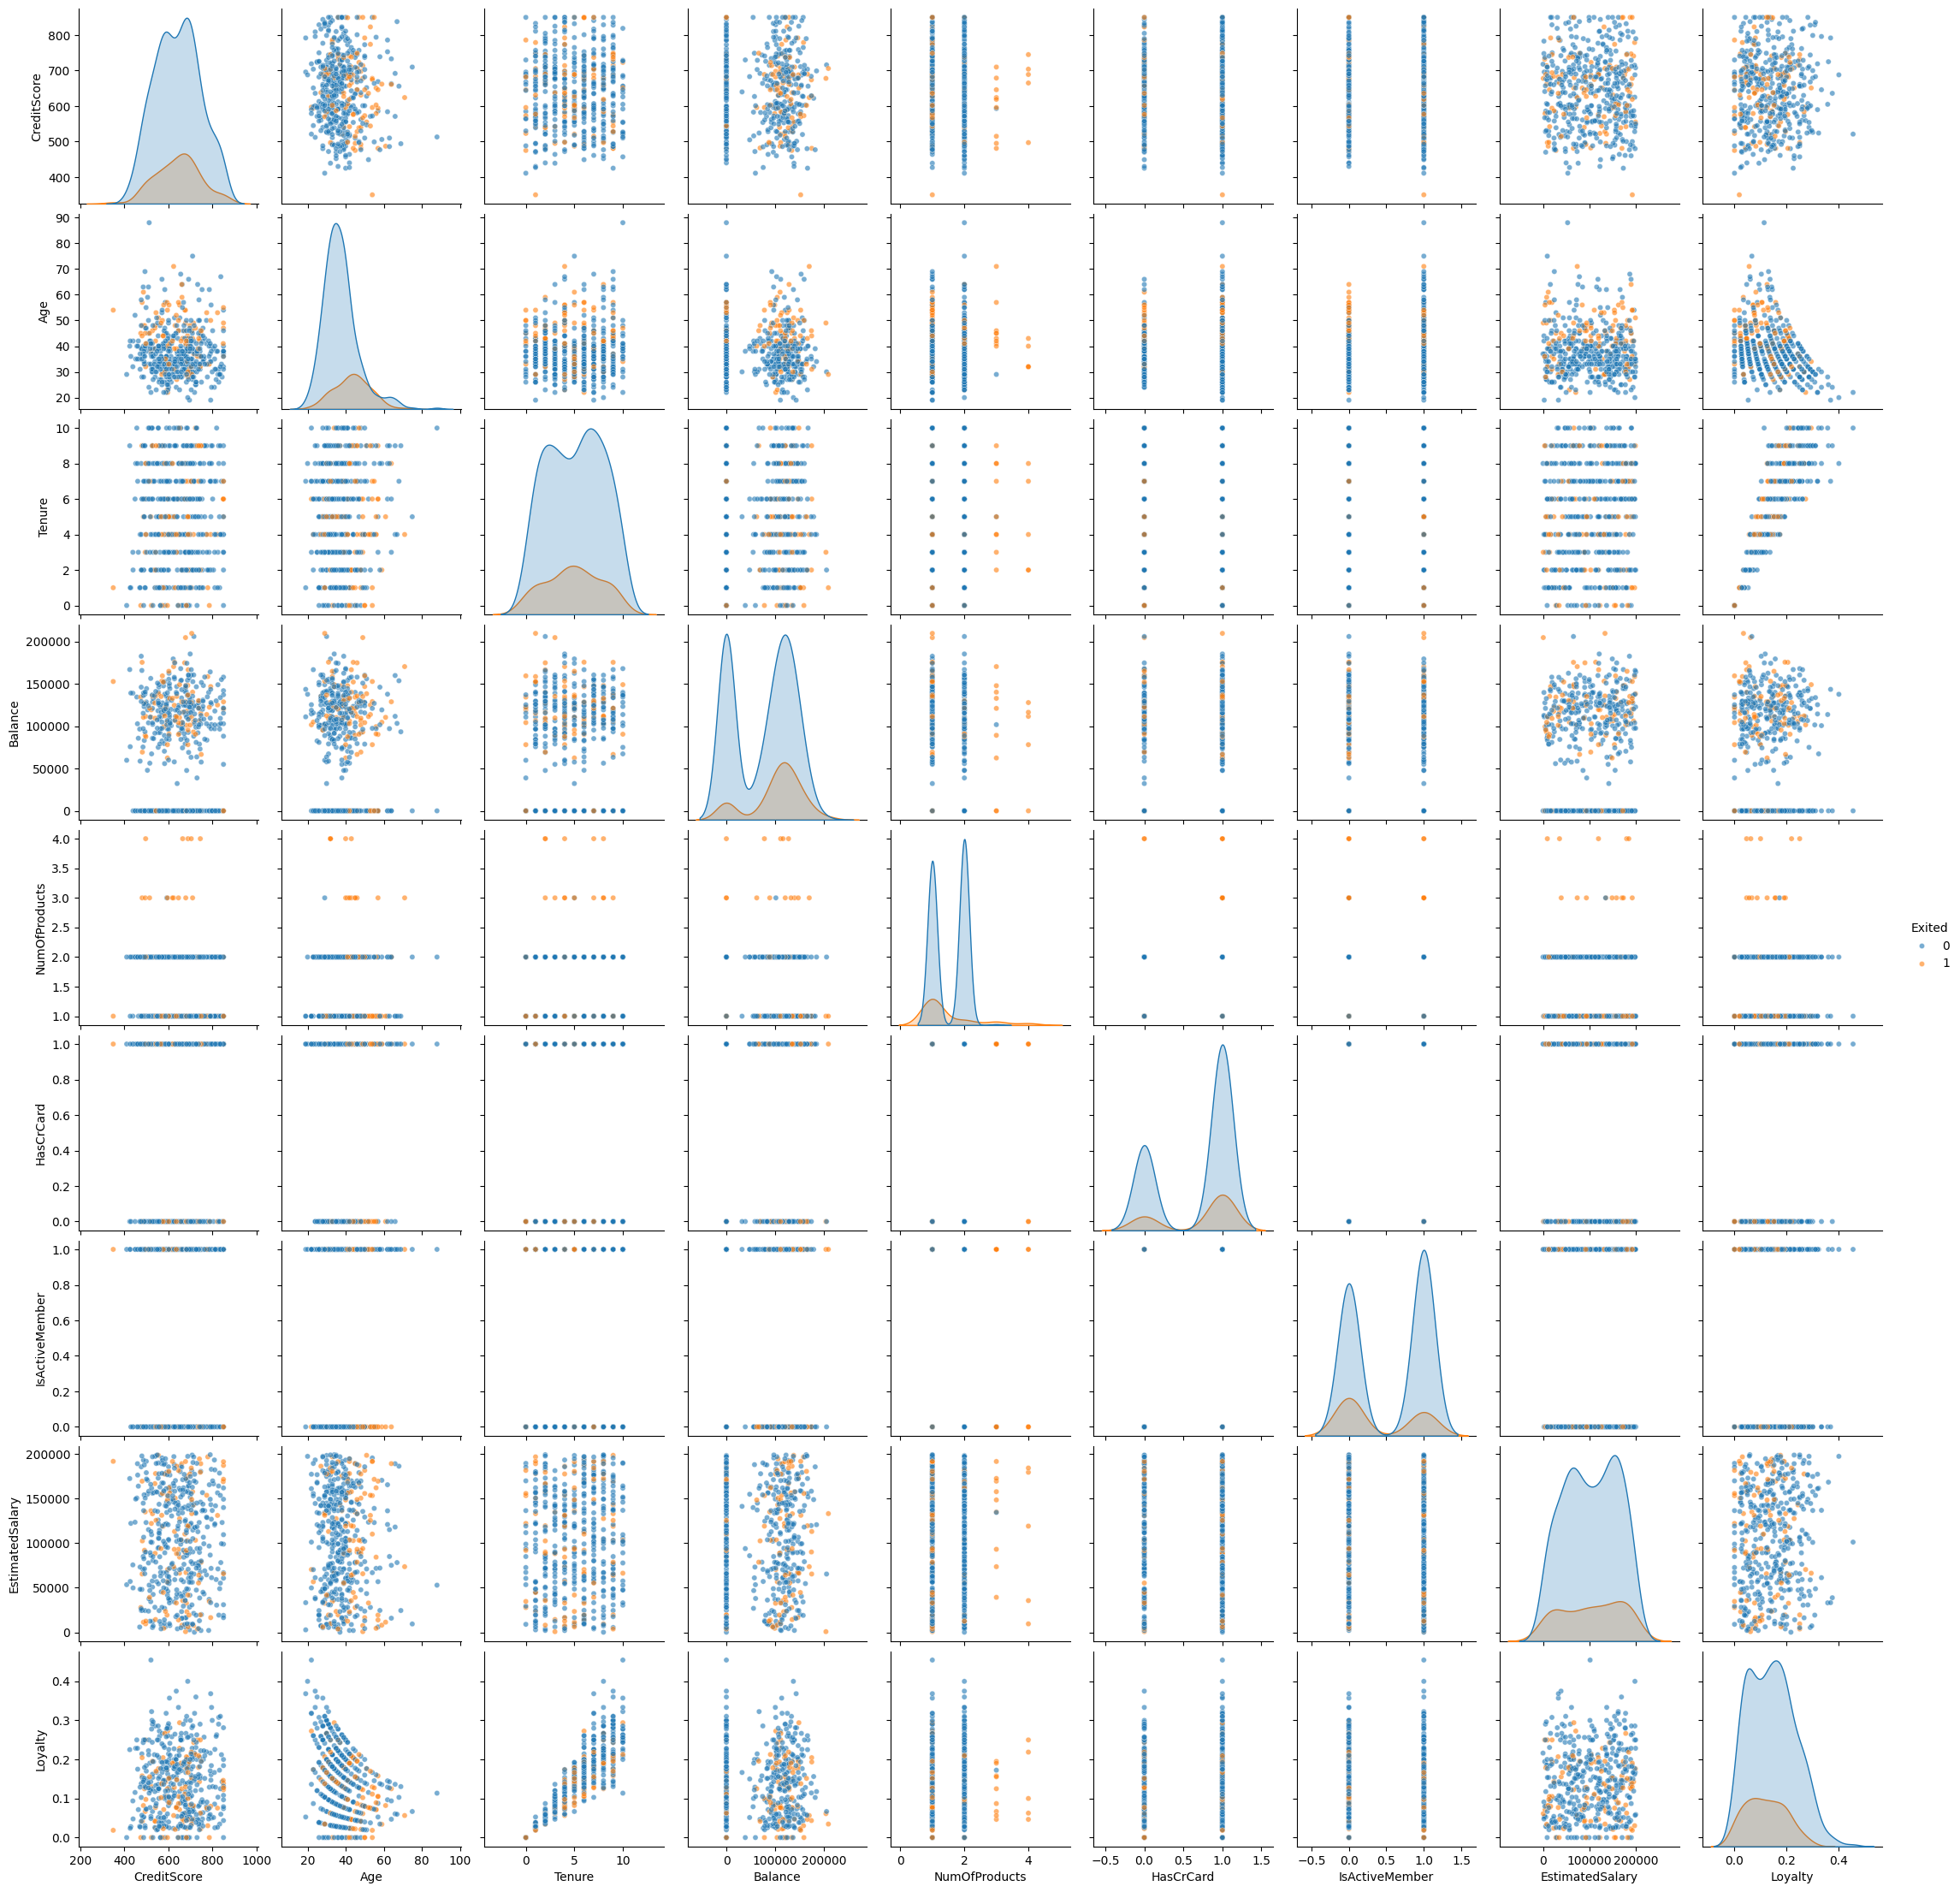

In [19]:
# Sample a subset if dataset is large
sample_df = num.sample(500, random_state=42)  # adjust sample size as needed
sns.pairplot(
    data=sample_df,
    hue='Exited',
    # corner=True,                   # only lower triangle plots
    # diag_kind='hist',               # faster than 'kde'
    plot_kws={'s': 20, 'alpha': 0.6}  # smaller, slightly transparent points
)

plt.show()

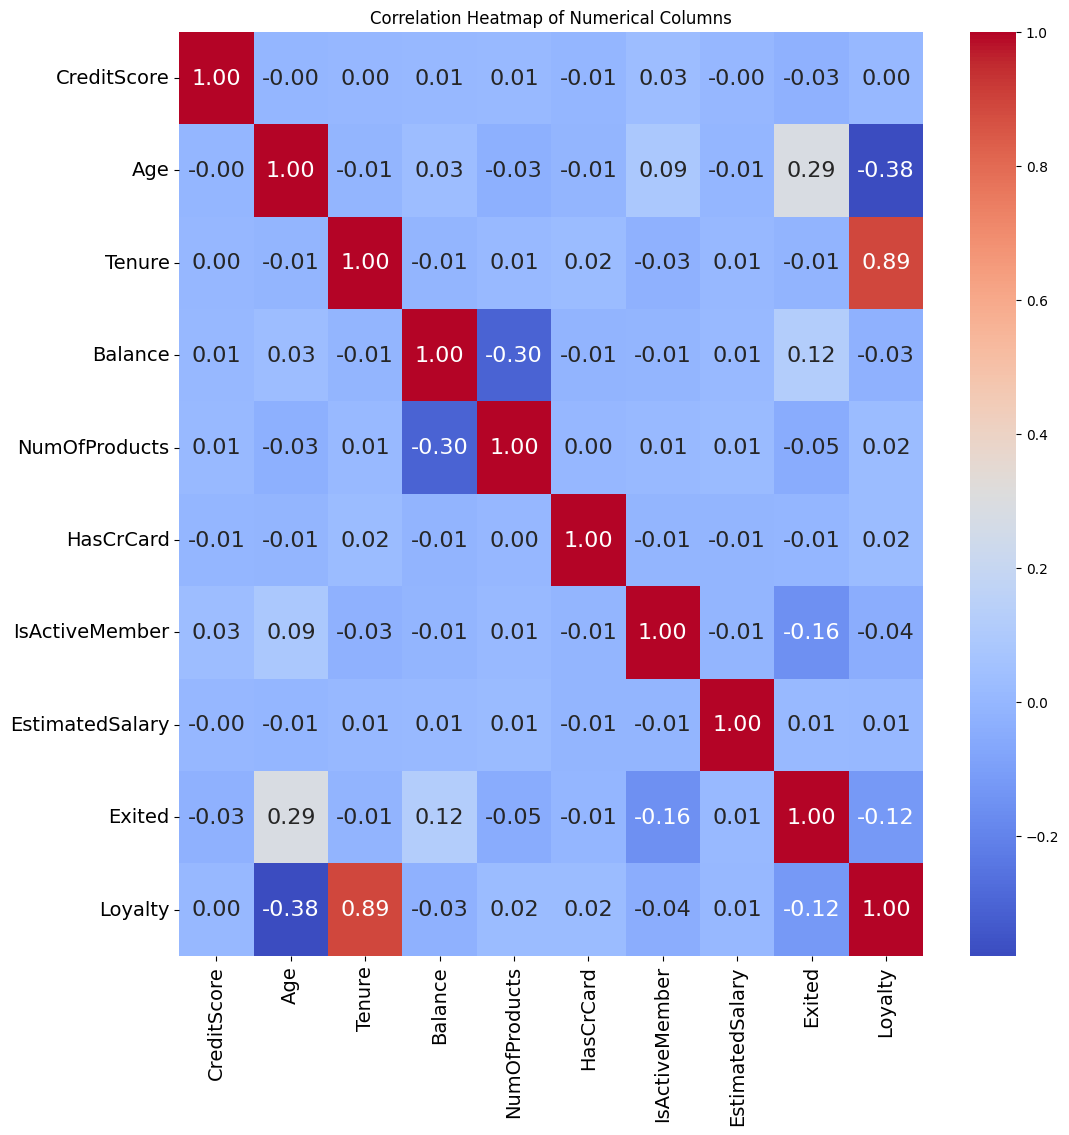

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(num.corr(),annot=True,cmap='coolwarm',fmt='.2f',annot_kws={"size": 16})
plt.title('Correlation Heatmap of Numerical Columns')
plt.yticks(rotation=360,fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,age
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,old
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,old
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,old
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,young
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,old


In [22]:
df_1 = pd.get_dummies(df, columns=['Geography', 'Gender','age'], drop_first=True)

In [23]:
df_1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain,Gender_Male,age_young
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,False,True,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,False,False,False,True
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,False,True,False,False


In [24]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Select both int and object type columns (after encoding)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Apply Chi-squared test to select top k features
selector = SelectKBest(score_func=chi2, k=8)  # Change k to the number of top features you want
selector.fit(X, y)

# Get selected feature mask and feature names
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print("Top selected features by Chi-squared test:")
print(selected_features.tolist())


Top selected features by Chi-squared test:
['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'IsActiveMember', 'EstimatedSalary', 'age']


In [25]:
df_copy = df_1.drop(columns=['Tenure','HasCrCard','EstimatedSalary'])

In [26]:
df_copy.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Exited,Loyalty,Geography_Germany,Geography_Spain,Gender_Male,age_young
0,619,42,0.00,1,1,1,0.047619,False,False,False,False
1,608,41,83807.86,1,1,0,0.024390,False,True,False,False
2,502,42,159660.80,3,0,1,0.190476,False,False,False,False
3,699,39,0.00,2,0,0,0.025641,False,False,False,True
4,850,43,125510.82,1,1,0,0.046512,False,True,False,False


In [27]:
x = df_copy.drop('Exited',axis=1)
y = df_copy['Exited']

In [28]:
x.head(1)

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Loyalty,Geography_Germany,Geography_Spain,Gender_Male,age_young
0,619,42,0.0,1,1,0.047619,False,False,False,False


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train.shape,x_test.shape

((8000, 10), (2000, 10))

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
x_train.shape

(8000, 10)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [34]:
model = Sequential()
model.add(Dense(512,activation='relu', input_dim=10,kernel_initializer=HeNormal()))
model.add(Dense(256,activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Hidden Layers
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer=HeNormal()))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer=HeNormal()))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1, activation='sigmoid'))


In [35]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Train model
history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_test, y_test)
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6196 - loss: 4.9894 - val_accuracy: 0.8335 - val_loss: 3.1888
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7896 - loss: 2.8334 - val_accuracy: 0.8615 - val_loss: 1.7750
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8348 - loss: 1.6109 - val_accuracy: 0.8595 - val_loss: 1.0455
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8454 - loss: 0.9663 - val_accuracy: 0.8625 - val_loss: 0.6882
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8379 - loss: 0.6703 - val_accuracy: 0.8595 - val_loss: 0.5229
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8406 - loss: 0.5273 - val_accuracy: 0.8480 - val_loss: 0.4581
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8469 - loss: 0.4515 - val_accuracy: 0.8640 - val_loss: 0.4041
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8363 - loss: 0.4275 - val_ac

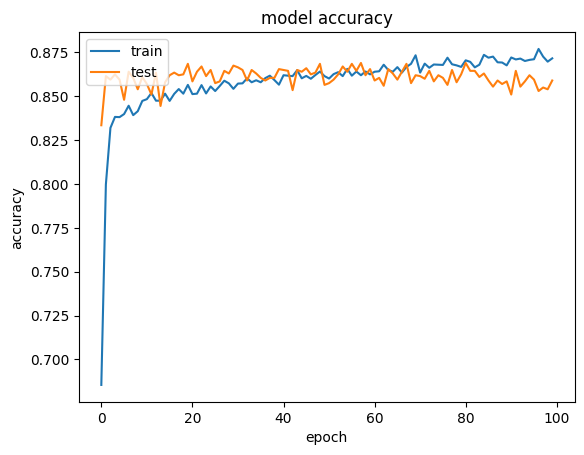

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

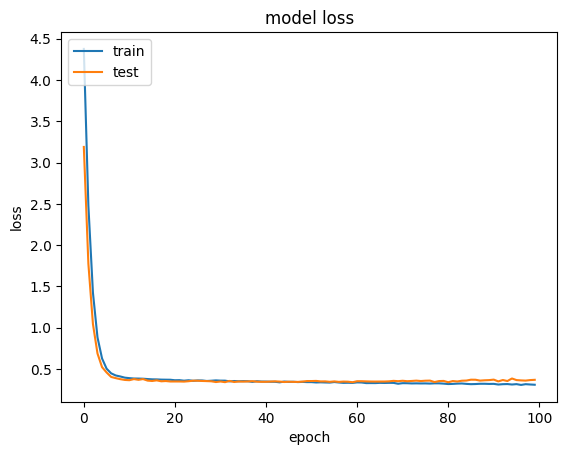

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
import pickle
model.save('Model.h5')
pickle.dump(scaler,open('Scaler.pkl','wb'))

In [40]:
x_train.shape

(8000, 10)

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def cum_information(CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography, Gender):

    expected_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                        'IsActiveMember', 'EstimatedSalary','Loyalty',
                        'Geography_Germany', 'Geography_Spain',
                        'Gender_Male', 'age_young']

    # Create DataFrame from input data
    data = pd.DataFrame({
        'CreditScore': [CreditScore],
        'Age': [Age],
        'Tenure': [Tenure],
        'Balance': [Balance],
        'NumOfProducts': [NumOfProducts],
        'HasCrCard': [HasCrCard],
        'IsActiveMember': [IsActiveMember],
        'EstimatedSalary': [EstimatedSalary],
        'Loyalty': [Age / Tenure],
        'Geography': [Geography],
        'Gender': [Gender]
    })

    data['age'] = data['Age'].apply(lambda x: 'old' if x > 40 else 'young')

    data = pd.get_dummies(data, columns=['Geography', 'Gender', 'age'], drop_first=False)

    for col in expected_columns:
        if col not in data.columns:
            data[col] = False

    data = data[expected_columns]
    data = data.drop(columns=['Tenure','HasCrCard','EstimatedSalary'])

    return data


In [42]:
df_1 = cum_information(619,42,2,0.0,1,1,1,101348.88,'France','Female')
df_1

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Loyalty,Geography_Germany,Geography_Spain,Gender_Male,age_young
0,619,42,0.0,1,1,21.0,False,False,False,False


In [43]:
x.head(1)

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Loyalty,Geography_Germany,Geography_Spain,Gender_Male,age_young
0,619,42,0.0,1,1,0.047619,False,False,False,False


In [44]:
x_data = scaler.transform(df_1)

In [45]:
data_1 = df.head(1)

In [46]:
z = model.predict(x_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


In [48]:
if z < 0.5:
  print('Customer will exit')
else:
  print('Customer will not exit')

Customer will not exit
